# Projekt praktyczny - regresja

Na start muszę zaimportować następujące biblioteki.

In [565]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import sklearn.metrics as metrics

Wczytuję bazę danych do pandas Dataframe.

In [566]:
file_path = "nyc-east-river-bicycle-counts.csv"
bikes_df = pd.read_csv(file_path)
bikes_df

,Unnamed: 0,Date,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,0,2016-04-01 00:00:00,2016-04-01 00:00:00,78.1,66.0,0.01,1704.0,3126,4115.0,2552.0,11497
1,1,2016-04-02 00:00:00,2016-04-02 00:00:00,55.0,48.9,0.15,827.0,1646,2565.0,1884.0,6922
2,2,2016-04-03 00:00:00,2016-04-03 00:00:00,39.9,34.0,0.09,526.0,1232,1695.0,1306.0,4759
3,3,2016-04-04 00:00:00,2016-04-04 00:00:00,44.1,33.1,0.47 (S),521.0,1067,1440.0,1307.0,4335
4,4,2016-04-05 00:00:00,2016-04-05 00:00:00,42.1,26.1,0,1416.0,2617,3081.0,2357.0,9471
...,...,...,...,...,...,...,...,...,...,...,...
205,205,2016-04-26 00:00:00,2016-04-26 00:00:00,60.1,46.9,0.24,1997.0,3520,4559.0,2929.0,13005
206,206,2016-04-27 00:00:00,2016-04-27 00:00:00,62.1,46.9,0,3343.0,5606,6577.0,4388.0,19914
207,207,2016-04-28 00:00:00,2016-04-28 00:00:00,57.9,48.0,0,2486.0,4152,5336.0,3657.0,15631
208,208,2016-04-29 00:00:00,2016-04-29 00:00:00,57.0,46.9,0.05,2375.0,4178,5053.0,3348.0,14954


Jak widać powyżej, jest to baza danych zawierająca ilość przejazdów rowerami przez cztery mosty znajdujące się w New York'u na rzece East River.

Muszę bliżej przyjrzeć sie bazie danych za pomocą niżej wykorzystanych funkcji czy komend.

In [567]:
#Sprawdzam kształt danych tabelarycznych
bikes_df.shape

(210, 11)

In [568]:
#Sprawdzam informacje o bazie danych
bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           210 non-null    int64  
 1   Date                 210 non-null    object 
 2   Day                  210 non-null    object 
 3   High Temp (°F)       210 non-null    float64
 4   Low Temp (°F)        210 non-null    float64
 5   Precipitation        210 non-null    object 
 6   Brooklyn Bridge      210 non-null    float64
 7   Manhattan Bridge     210 non-null    int64  
 8   Williamsburg Bridge  210 non-null    float64
 9   Queensboro Bridge    210 non-null    float64
 10  Total                210 non-null    int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 18.2+ KB


Mozna zauważyć, że baza danych posiada 210 wierszy, jednak data pomiarów to między pierwszym, a trzydziestym kwietnia 2016 roku.

In [569]:
#Sprawdzam unikalne wartości dla każdej kolumny
for i in bikes_df.columns:
    print(f"{i} have {bikes_df[i].nunique()} unique values")

Unnamed: 0 have 210 unique values
Date have 30 unique values
Day have 30 unique values
High Temp (°F) have 21 unique values
Low Temp (°F) have 21 unique values
Precipitation have 10 unique values
Brooklyn Bridge have 30 unique values
Manhattan Bridge have 30 unique values
Williamsburg Bridge have 30 unique values
Queensboro Bridge have 30 unique values
Total have 30 unique values


In [570]:
#Zliczam liczbe unikalnych elementów w kolumnie 'Date' by się upewnić
bikes_df['Date'].value_counts()

2016-04-01 00:00:00    7
2016-04-02 00:00:00    7
2016-04-29 00:00:00    7
2016-04-28 00:00:00    7
2016-04-27 00:00:00    7
2016-04-26 00:00:00    7
2016-04-25 00:00:00    7
2016-04-24 00:00:00    7
2016-04-23 00:00:00    7
2016-04-22 00:00:00    7
2016-04-21 00:00:00    7
2016-04-20 00:00:00    7
2016-04-19 00:00:00    7
2016-04-18 00:00:00    7
2016-04-17 00:00:00    7
2016-04-16 00:00:00    7
2016-04-15 00:00:00    7
2016-04-14 00:00:00    7
2016-04-13 00:00:00    7
2016-04-12 00:00:00    7
2016-04-11 00:00:00    7
2016-04-10 00:00:00    7
2016-04-09 00:00:00    7
2016-04-08 00:00:00    7
2016-04-07 00:00:00    7
2016-04-06 00:00:00    7
2016-04-05 00:00:00    7
2016-04-04 00:00:00    7
2016-04-03 00:00:00    7
2016-04-30 00:00:00    7
Name: Date, dtype: int64

In [571]:
#To samo powtarzam dla kolumny 'Brooklyn Bridge'
bikes_df['Brooklyn Bridge'].value_counts()

1704.0    7
827.0     7
2375.0    7
2486.0    7
3343.0    7
1997.0    7
3463.0    7
2798.0    7
2055.0    7
2975.0    7
3436.0    7
3450.0    7
3501.0    7
3871.0    7
3147.0    7
2384.0    7
2770.0    7
2861.0    7
2840.0    7
1045.0    7
2005.0    7
1447.0    7
504.0     7
1982.0    7
1276.0    7
1885.0    7
1416.0    7
521.0     7
526.0     7
3199.0    7
Name: Brooklyn Bridge, dtype: int64

Przed usunięciem powtarzających sie wierszy, usunę niepotrzebne kolumny 'Unnamed' oraz 'Day'.

In [572]:
bikes_df.drop('Unnamed: 0', inplace=True, axis=1)
bikes_df.drop('Day', inplace=True, axis=1)

In [573]:
#resetowanie indeksu jako kolumnę 'Date' oraz usunięcie niepotrzebych godzin z nazwy kolumny
bikes_df = bikes_df.set_index('Date')
bikes_df.index = pd.DatetimeIndex(data=bikes_df.index)

In [574]:
#Usunięcie zduplikowanych wierszy
bikes_df = bikes_df.drop_duplicates()

In [575]:
bikes_df.head()

,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
Date,,,,,,,,
2016-04-01,78.1,66.0,0.01,1704.0,3126,4115.0,2552.0,11497
2016-04-02,55.0,48.9,0.15,827.0,1646,2565.0,1884.0,6922
2016-04-03,39.9,34.0,0.09,526.0,1232,1695.0,1306.0,4759
2016-04-04,44.1,33.1,0.47 (S),521.0,1067,1440.0,1307.0,4335
2016-04-05,42.1,26.1,0,1416.0,2617,3081.0,2357.0,9471


In [576]:
bikes_df.shape

(30, 8)

Cofajac sie do tego jak wyświetlałem informacje o bazie danych, widać, że dane związane z ilościa przejazdów przez mosty, zapisane są w zależności od mostu w postaci int64 lub float64. Nie jest to logiczne by przez most mogła przejechać tylko jakaś część roweru czy człowieka. 

In [577]:
bikes_df["Brooklyn Bridge"] = bikes_df["Brooklyn Bridge"].astype("int64")
bikes_df["Williamsburg Bridge"] = bikes_df["Williamsburg Bridge"].astype("int64")
bikes_df["Queensboro Bridge"] = bikes_df["Queensboro Bridge"].astype("int64")

Muszę zająć się również kolumną 'Precipitation', w której nie występują ujednolicone znaki. 

In [578]:
bikes_df['Precipitation'].value_counts()

0           17
0.01         3
0.09         3
0.15         1
0.47 (S)     1
0.2          1
T            1
0.16         1
0.24         1
0.05         1
Name: Precipitation, dtype: int64

In [579]:
def change_to_float(val):
    res = ''.join(c for c in val if ( c.isdigit() or c == '.') )
    return float(res) if res != '' else 0.00

In [580]:
data = list(bikes_df['Precipitation'])

new_data = list()
for i, value in enumerate(data):
    if value == '0':
        new_data.append('Clear')
        data[i] = float(data[i])
    elif 'S' in value:
        new_data.append('Snow')
        data[i] = change_to_float(value)
    elif 'T' in value:
        new_data.append('Trace')
        data[i] = change_to_float(value)
    else:
        new_data.append('Rain')
        data[i] = float(data[i])

In [581]:
bikes_df['Precipitation'] = data

In [582]:
bikes_df.insert(loc=3, column='Percipitation type', value=new_data)

In [583]:
bikes_df.head()

,High Temp (°F),Low Temp (°F),Precipitation,Percipitation type,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
Date,,,,,,,,,
2016-04-01,78.1,66.0,0.01,Rain,1704,3126,4115,2552,11497
2016-04-02,55.0,48.9,0.15,Rain,827,1646,2565,1884,6922
2016-04-03,39.9,34.0,0.09,Rain,526,1232,1695,1306,4759
2016-04-04,44.1,33.1,0.47,Snow,521,1067,1440,1307,4335
2016-04-05,42.1,26.1,0.00,Clear,1416,2617,3081,2357,9471


In [584]:
bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 2016-04-01 to 2016-04-30
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   High Temp (°F)       30 non-null     float64
 1   Low Temp (°F)        30 non-null     float64
 2   Precipitation        30 non-null     float64
 3   Percipitation type   30 non-null     object 
 4   Brooklyn Bridge      30 non-null     int64  
 5   Manhattan Bridge     30 non-null     int64  
 6   Williamsburg Bridge  30 non-null     int64  
 7   Queensboro Bridge    30 non-null     int64  
 8   Total                30 non-null     int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 2.3+ KB


Za pomocą 'get dummies' zmienię kolumne z danymi typu 'object', na kolumny kategerialne z danymi w postaci 'int'.

In [585]:
categorical_columns_ls = bikes_df.select_dtypes(
    ["object", "category"]
).columns.to_list()

bikes_df = pd.get_dummies(
    data=bikes_df,
    prefix_sep="_",
    columns=categorical_columns_ls,
    drop_first=True,
    dtype="int8",
)

In [586]:
bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 2016-04-01 to 2016-04-30
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   High Temp (°F)            30 non-null     float64
 1   Low Temp (°F)             30 non-null     float64
 2   Precipitation             30 non-null     float64
 3   Brooklyn Bridge           30 non-null     int64  
 4   Manhattan Bridge          30 non-null     int64  
 5   Williamsburg Bridge       30 non-null     int64  
 6   Queensboro Bridge         30 non-null     int64  
 7   Total                     30 non-null     int64  
 8   Percipitation type_Rain   30 non-null     int8   
 9   Percipitation type_Snow   30 non-null     int8   
 10  Percipitation type_Trace  30 non-null     int8   
dtypes: float64(3), int64(5), int8(3)
memory usage: 2.2 KB


In [587]:
bikes_df.head()

,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total,Percipitation type_Rain,Percipitation type_Snow,Percipitation type_Trace
Date,,,,,,,,,,,
2016-04-01,78.1,66.0,0.01,1704,3126,4115,2552,11497,1,0,0
2016-04-02,55.0,48.9,0.15,827,1646,2565,1884,6922,1,0,0
2016-04-03,39.9,34.0,0.09,526,1232,1695,1306,4759,1,0,0
2016-04-04,44.1,33.1,0.47,521,1067,1440,1307,4335,0,1,0
2016-04-05,42.1,26.1,0.00,1416,2617,3081,2357,9471,0,0,0


Dzielę dane na zbiór treningowy i testowy.

In [588]:
from sklearn.model_selection import train_test_split

X = bikes_df.drop("Total", axis=1)
y = bikes_df["Total"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("X_train shape= ", X_train.shape)
print("X_test shape= ", X_test.shape)
print("y_train shape= ", y_train.shape)
print("y_train shape= ", y_test.shape)
X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)

X_train shape=  (24, 10)
X_test shape=  (6, 10)
y_train shape=  (24,)
y_train shape=  (6,)


Sprawdzam korelacje między kolumnami.

In [589]:
X_train.join(y_train).corr()

,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Percipitation type_Rain,Percipitation type_Snow,Percipitation type_Trace,Total
High Temp (°F),1.000000,0.852211,-0.354278,0.666231,0.638702,0.705424,0.649919,-0.173940,-0.318222,0.340503,0.670889
Low Temp (°F),0.852211,1.000000,-0.192898,0.403560,0.396921,0.484032,0.412456,0.178000,-0.295526,0.335258,0.431701
Precipitation,-0.354278,-0.192898,1.000000,-0.644985,-0.642891,-0.619181,-0.638132,0.300181,0.768841,-0.116111,-0.637902
Brooklyn Bridge,0.666231,0.403560,-0.644985,1.000000,0.979963,0.979863,0.978252,-0.613488,-0.381563,0.152290,0.988200
Manhattan Bridge,0.638702,0.396921,-0.642891,0.979963,1.000000,0.990439,0.990016,-0.605023,-0.378647,0.102327,0.996572
Williamsburg Bridge,0.705424,0.484032,-0.619181,0.979863,0.990439,1.000000,0.989758,-0.551004,-0.404070,0.139925,0.996711
Queensboro Bridge,0.649919,0.412456,-0.638132,0.978252,0.990016,0.989758,1.000000,-0.573091,-0.395764,0.100245,0.994967
Percipitation type_Rain,-0.173940,0.178000,0.300181,-0.613488,-0.605023,-0.551004,-0.573091,1.000000,-0.176227,-0.176227,-0.585690
Percipitation type_Snow,-0.318222,-0.295526,0.768841,-0.381563,-0.378647,-0.404070,-0.395764,-0.176227,1.000000,-0.043478,-0.392812
Percipitation type_Trace,0.340503,0.335258,-0.116111,0.152290,0.102327,0.139925,0.100245,-0.176227,-0.043478,1.000000,0.123529


<AxesSubplot:>

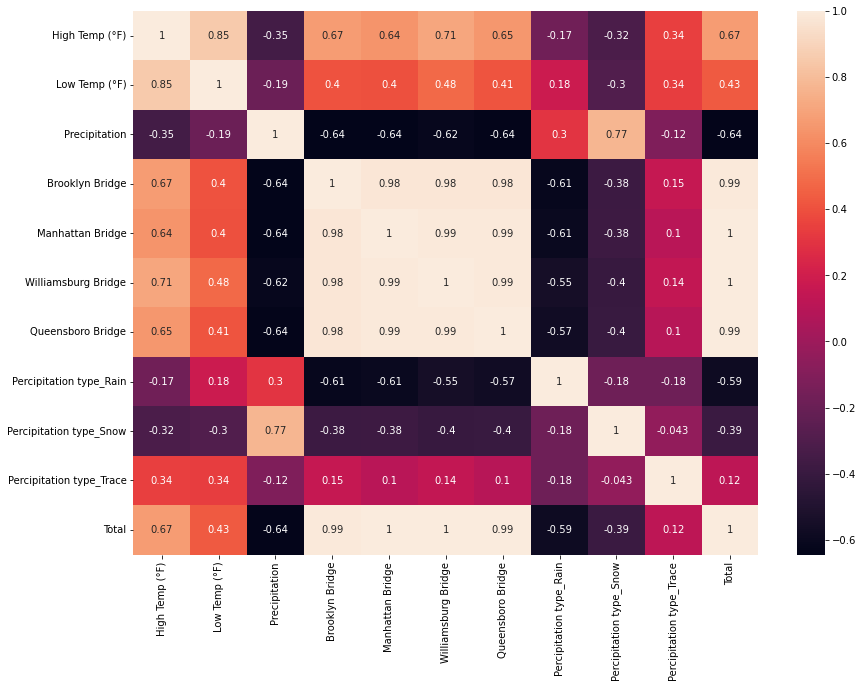

In [590]:
plt.rcParams["figure.figsize"] = [14, 10]

sns.heatmap(X_train.join(y_train).corr(), annot=True)

By lepiej nauczyć model usuwam silnie skorelowane kolumny.

In [591]:
X_train.drop(['Brooklyn Bridge', 'Manhattan Bridge','Queensboro Bridge','Low Temp (°F)'], axis=1, inplace=True)
X_test.drop(['Brooklyn Bridge', 'Manhattan Bridge','Queensboro Bridge','Low Temp (°F)'], axis=1, inplace=True)

In [592]:
X_train.join(y_train).head()

,High Temp (°F),Precipitation,Williamsburg Bridge,Percipitation type_Rain,Percipitation type_Snow,Percipitation type_Trace,Total
0,57.0,0.05,5053,1,0,0,14954
1,66.9,0.00,6845,0,0,0,20850
2,57.0,0.00,5995,0,0,0,18422
3,78.1,0.01,4115,1,0,0,11497
4,42.1,0.00,3081,0,0,0,9471


Pokazanie korelacji mmiędzy danymi na wykresach, by wybrać te które nadadzą się do modelu regresji.

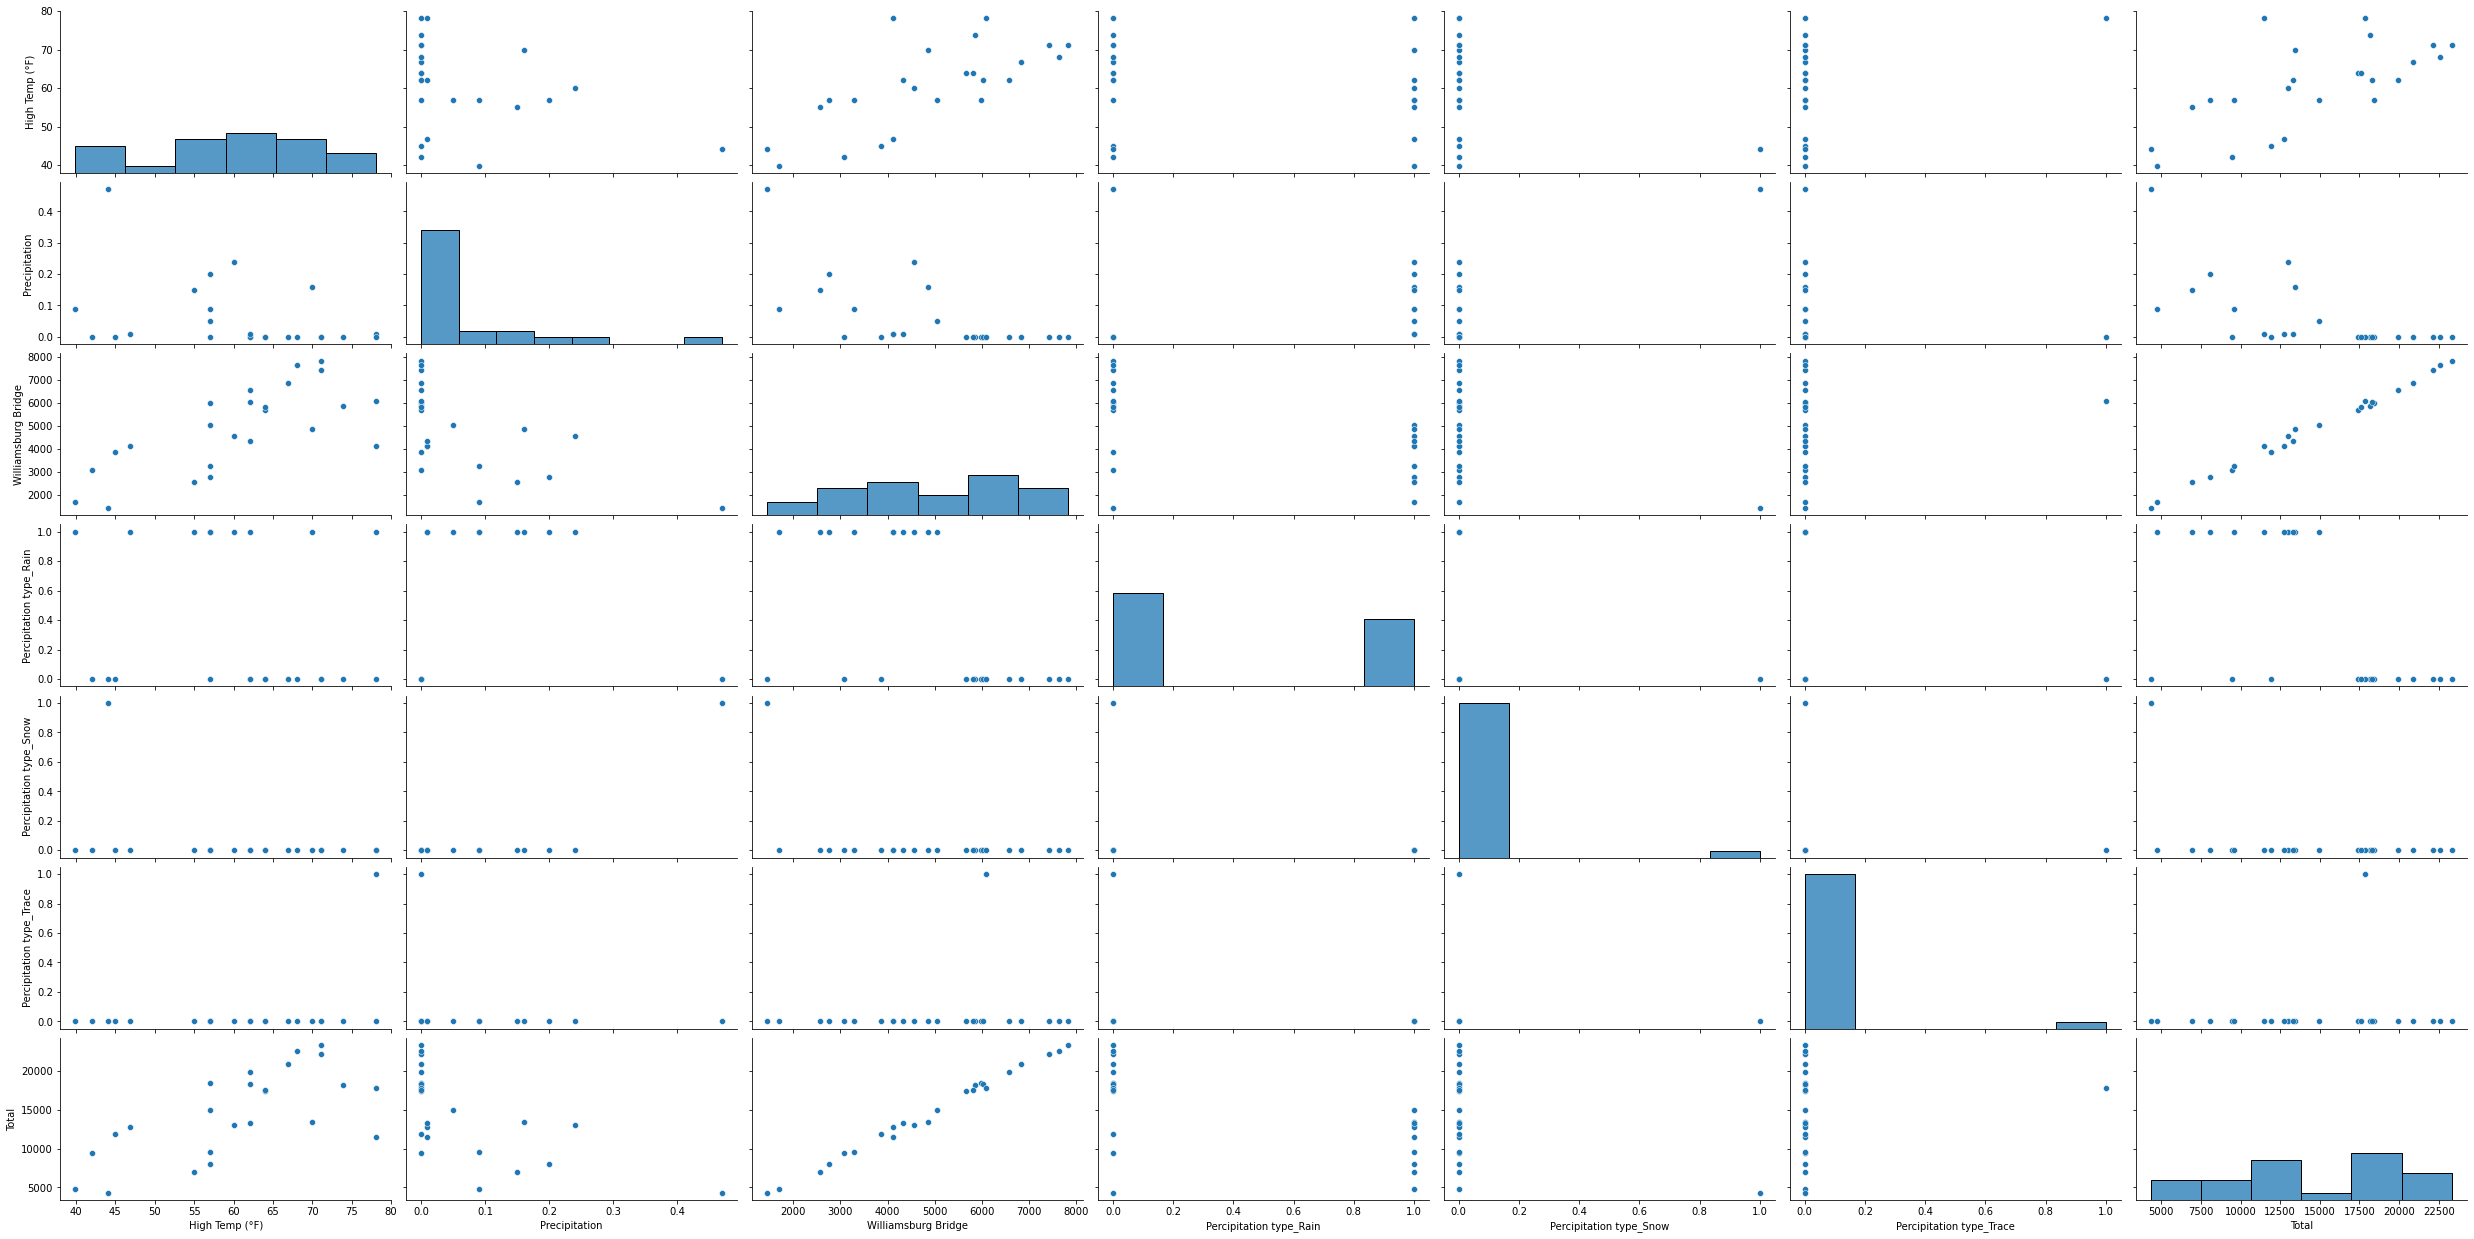

In [593]:
sns.pairplot(X_train.join(y_train), kind="scatter", aspect=2)

Funkcja przygotowana pod wykresy fukcji liniowej i kwadratowej

In [594]:
def polynomial_plot(feature, label):
 
    linear_func = np.poly1d(np.polyfit(feature, label, 1))
    
    quadratic_func = np.poly1d(np.polyfit(feature, label, 2))

  
    values = np.linspace(feature.min(), feature.max(), len(feature))

    plt.scatter(feature, label, color="blue")
    plt.plot(
        values,
        linear_func(values),
        color="cyan",
        linestyle="dashed",
        label="Linear Function",
    )
    plt.plot(values, quadratic_func(values), color="red", label="Quadratic Function")
    plt.xlabel("%s From Train Data" % (feature.name))
    plt.ylabel("Total")
    plt.legend()
    plt.title("Linear Vs Quadratic Function For Feature %s" % (feature.name))
    plt.show()

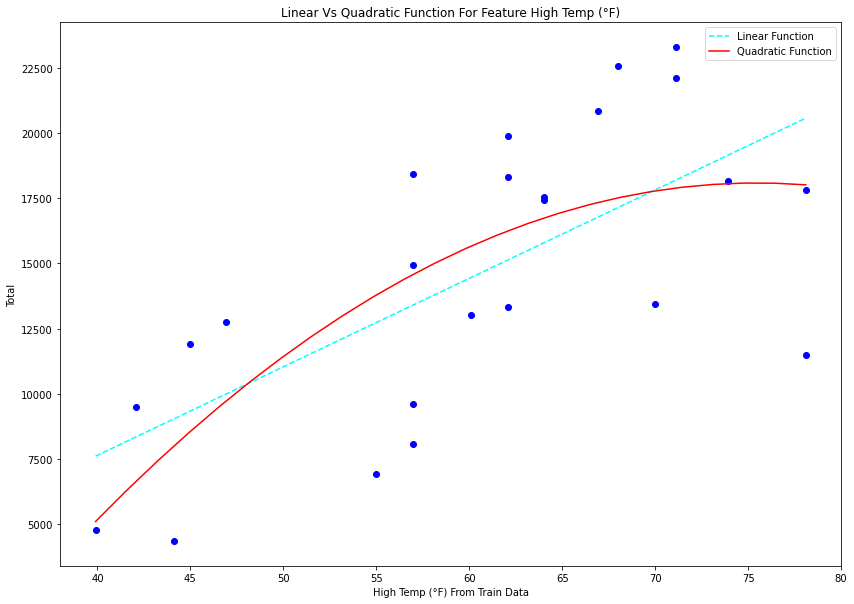

In [595]:
polynomial_plot(X_train['High Temp (°F)'], y_train)

Jak widać wykres, sumy przejazdów od temperatury nie jest dobrze opisany za pomocą funkcji liniowej czy kwadratowej. Dużo lepiej to wygląda, gdy zamiast temperatury, weźmniemy przejazdy przez most Williamsburg.

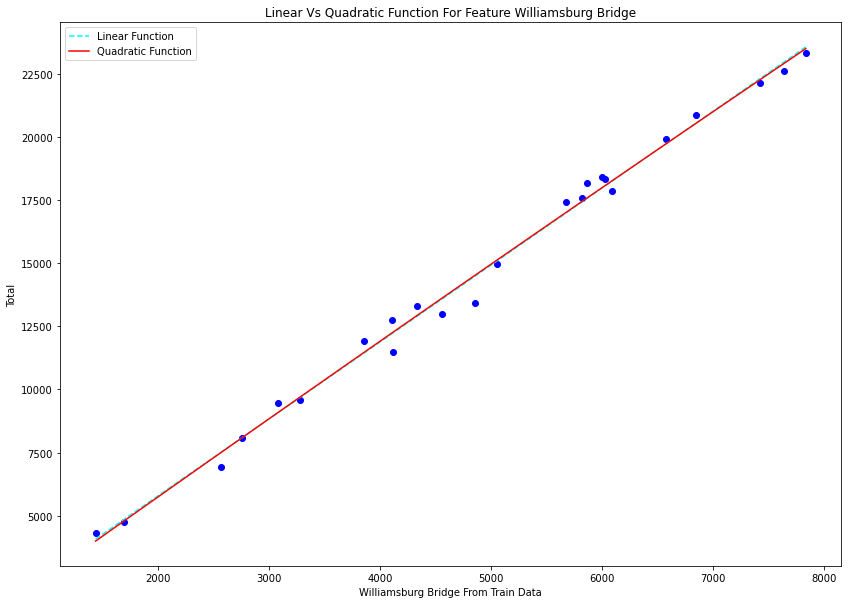

In [596]:
polynomial_plot(X_train['Williamsburg Bridge'], y_train)

Za pomocą PolunomialFeatures transformuję dane do postaci wielomianowej.

In [597]:
continous_features_ls = X_train.select_dtypes("float64").columns.to_list()

poly = PolynomialFeatures(degree=2)
X_cont_poly_train = poly.fit_transform(X_train[continous_features_ls])
X_cont_poly_train = pd.DataFrame(
    X_cont_poly_train, columns=poly.get_feature_names_out(X_train[continous_features_ls].columns)
)
X_cont_poly_train.columns

Index(['1', 'High Temp (°F)', 'Precipitation', 'High Temp (°F)^2',
       'High Temp (°F) Precipitation', 'Precipitation^2'],
      dtype='object')

In [598]:
X_cont_poly_train.shape

(24, 6)

In [599]:
X_train.shape

(24, 6)

In [600]:
X_cont_poly_test = poly.transform(X_test[continous_features_ls])
X_cont_poly_test = pd.DataFrame(
    X_cont_poly_test,
    columns=poly.get_feature_names_out(X_test[continous_features_ls].columns),
)
X_poly_test = pd.concat(
    [
        X_test.select_dtypes("uint8").reset_index(drop=True),
        X_cont_poly_test.reset_index(drop=True),
    ],
    axis=1,
)
X_poly_test

,1,High Temp (°F),Precipitation,High Temp (°F)^2,High Temp (°F) Precipitation,Precipitation^2
0,1.0,57.9,0.00,3352.41,0.00,0.0000
1,1.0,66.0,0.00,4356.00,0.00,0.0000
2,1.0,68.0,0.00,4624.00,0.00,0.0000
3,1.0,81.0,0.00,6561.00,0.00,0.0000
4,1.0,43.0,0.09,1849.00,3.87,0.0081
5,1.0,48.9,0.00,2391.21,0.00,0.0000


Tworze instancję modely regresji i trenuję go.

In [601]:
lm_poly_2deg = LinearRegression() 
lm_poly_2deg.fit(X_poly_train, y_train) 

LinearRegression()

In [602]:
train_pred = lm_poly_2deg.predict(X_poly_train)

In [603]:
test_pred = lm_poly_2deg.predict(X_poly_test)

Wykorzystanie współczynników za pomocą, których można ocenić na ile dobra jest regresja.

In [604]:
def regression_results(y_true, y_pred):

    explained_variance = metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error = metrics.mean_absolute_error(y_true, y_pred)
    mse = metrics.mean_squared_error(y_true, y_pred)
    median_absolute_error = metrics.median_absolute_error(y_true, y_pred)
    r2 = metrics.r2_score(y_true, y_pred)
    print("explained_variance: ", round(explained_variance, 4))
    print("R^2: ", round(r2, 4))
    print("MAE: ", round(mean_absolute_error, 4))
    print("MSE: ", round(mse, 4))
    print("RMSE: ", round(np.sqrt(mse), 4))

In [605]:
regression_results(y_train, train_pred)

explained_variance:  0.8112
R^2:  0.8112
MAE:  1803.1624
MSE:  5612766.9353
RMSE:  2369.1279


In [606]:
regression_results(y_test, test_pred)

explained_variance:  0.5971
R^2:  0.5673
MAE:  3279.4448
MSE:  15281296.297
RMSE:  3909.1299


Porównanie wartości na wykresie przewidzianych z tymi, ze zbioru testowego.

Text(0.5, 1.0, 'Total ze zbioru testowa Vs predykcja total na nowych danych')

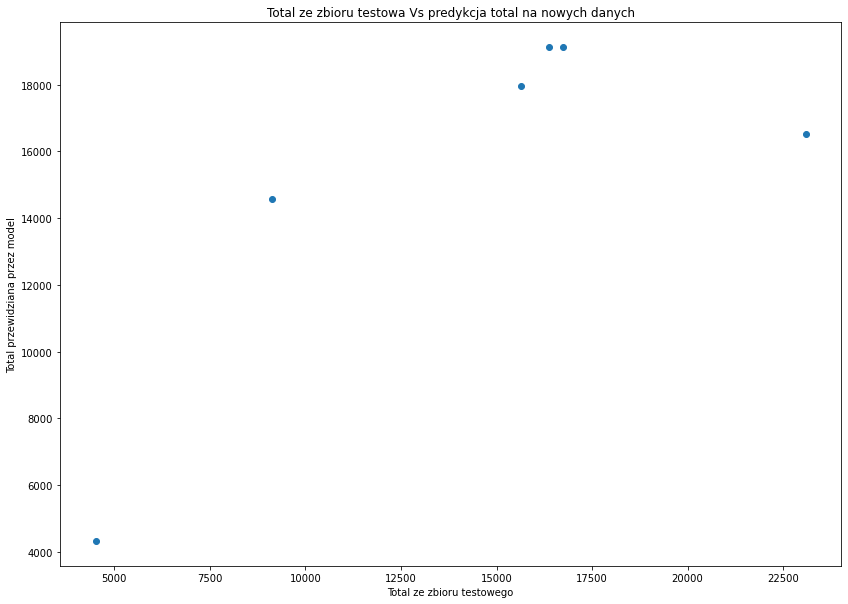

In [607]:
plt.scatter(y_test, test_pred)
plt.xlabel('Total ze zbioru testowego')
plt.ylabel('Total przewidziana przez model')
plt.title("Total ze zbioru testowa Vs predykcja total na nowych danych")

Jak widać powyżej model na zbiorze testowym posiada współczynnik R^2 na poziomie 0,5673, co znaczy, że model wyjaśnia ok. 56,7% zmienności zmiennej y. Jest to dość słaby wynik.

Sprawdzę czy wynik poprawi się jeżeli model regresji uzależnimy tylko od jednej cechy.

In [608]:
X = bikes_encoded_df[["Williamsburg Bridge"]]
y = bikes_encoded_df[["Total"]]
cv = KFold(n_splits = 5, shuffle = True, random_state = 42)
for train, test in cv.split(X, y):
    X_train, y_train = X.iloc[train], y.iloc[train]
    X_test, y_test = X.iloc[test], y.iloc[test]
    #print(X_train.shape, X_test.shape)


print("X_train shape= ", X_train.shape)
print("X_test shape= ", X_test.shape)
print("y_train shape= ", y_train.shape)
print("y_train shape= ", y_test.shape)
X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)

X_train shape=  (24, 1)
X_test shape=  (6, 1)
y_train shape=  (24, 1)
y_train shape=  (6, 1)


In [609]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [610]:
y_pred = model.predict(X)

In [611]:
print(f"R^2 train score:  {r2_score(y, y_pred)}")

R^2 train score:  0.9932118409821802


In [612]:
model = LinearRegression()
model.fit(X_test, y_test)

LinearRegression()

In [613]:
y_pred = model.predict(X)

In [614]:
print(f"R^2 test score: {r2_score(y, y_pred)}")

R^2 test score: 0.9908035301810437


W tym przypadku gdy użyjemy jednej zmiennej nasz model regresji nauczył się o wiele lepiej.